# Load embeddings

In [1]:
import numpy as np

# Load node embeddings
embeddings_dict = np.load("../data/processed/node_embeddings.npy", allow_pickle=True).item()

# Convert to matrix
X = np.array(list(embeddings_dict.values()))
node_ids = list(embeddings_dict.keys())

# Clustering Nodes by Role using KMeans

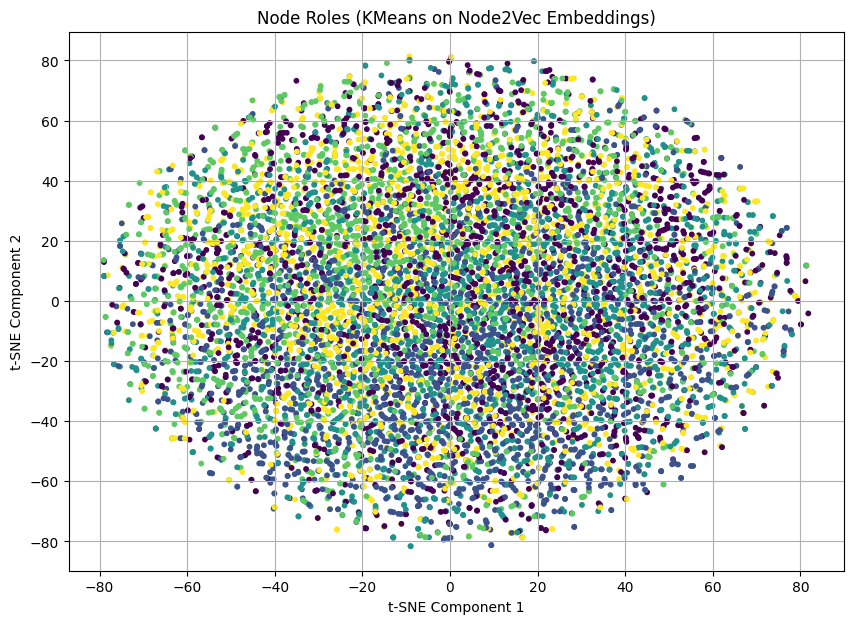

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose number of roles (clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize clusters using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Node Roles (KMeans on Node2Vec Embeddings)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# Detect Anomalies using Isolation Forest

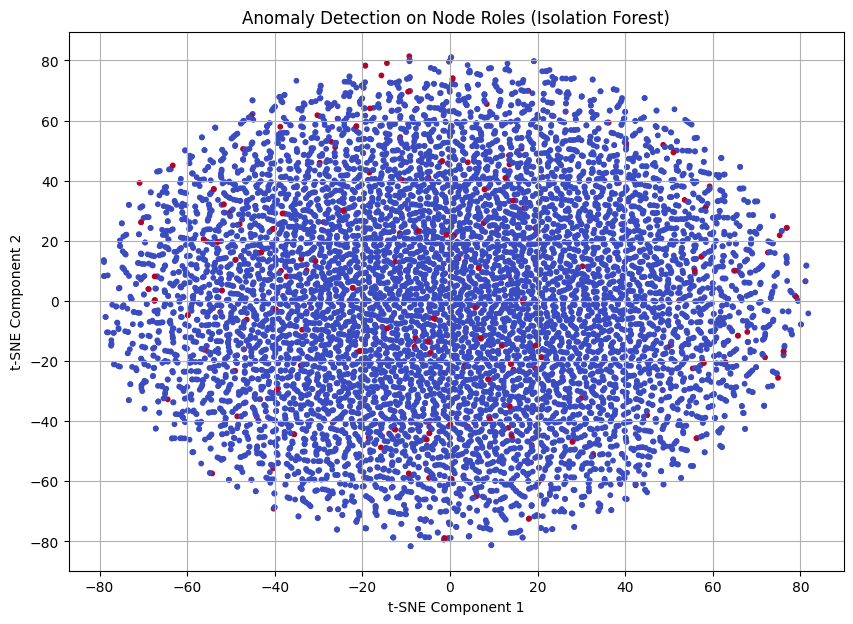

In [3]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)  # 2% of nodes are anomalies
anomaly_flags = iso.fit_predict(X)  # -1 = anomaly, 1 = normal

# Visualize anomalies
plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=(anomaly_flags == -1), cmap='coolwarm', s=10)
plt.title("Anomaly Detection on Node Roles (Isolation Forest)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# Save Detected Roles & Anomalies

In [4]:
import pandas as pd

role_df = pd.DataFrame({
    "node_id": node_ids,
    "role_label": labels,
    "is_anomaly": anomaly_flags == -1
})

role_df.to_csv("../outputs/node_roles_anomalies.csv", index=False)